In [38]:
import pickle
from random import shuffle

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import classification_report, f1_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from src.parsers import NewsgroupsParser, ReutersParser, CranfieldParser
from src.engines.doc2vec import Doc2VecModel

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

cv.fit_transform(['hello world'])

In [103]:
CRANFIELD = CranfieldParser()
REUTERS = ReutersParser()
NEWSGROUPS = NewsgroupsParser()

doc2vec = Doc2VecModel(dataset=NEWSGROUPS, use_predictor=False)

In [109]:
shuffle(NEWSGROUPS.entries)
entries = NEWSGROUPS.entries

X = np.array([doc2vec.model.dv[entry.id] for entry in entries], dtype='double')

In [105]:
kmeans = KMeans(n_clusters=8, n_init=4, random_state=42)
kmeans.fit(X)

KMeans(n_init=4, random_state=42)

In [111]:
kmeans.cluster_centers_
pred = kmeans.predict([X[0]])

array([6], dtype=int32)

In [106]:
pca = PCA(n_components=3)
new = pca.fit_transform(X)

(18828, 3)

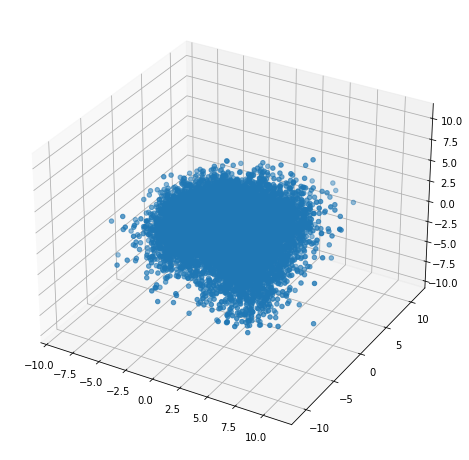

In [108]:
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(projection='3d')

ax.scatter(new[:, 0], new[:, 1], new[:, 2])
